In [1]:
import pandas as pd
import numpy as np
from pandas import *
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
data = read_csv("steam_gamesClean.csv", dtype=str, delimiter=';', on_bad_lines='skip')
data.head()

,App ID,Name,Short Description,Developer,Publisher,Genre,Tags,Type,Categories,Owners,...,Price,Initial Price,Discount,CCU,Languages,Platforms,Release Date,Required Age,Website,"Header Image,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,10,Counter-Strike,Play the world's number 1 online action game. ...,Valve,Valve,Action,"Action: 5426, FPS: 4831, Multiplayer: 3392, Sh...",game,"Multi-player, Valve Anti-Cheat enabled, Online...","10,0,000 .. 20,0,000",...,999,999,0,13990,"English, French, German, Italian, Spanish - Sp...","windows, mac, linux",2000/11/1,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
1,1000000,ASCENXION,ASCENXION is a 2D shoot 'em up game where you ...,IndigoBlue Game Studio,PsychoFlux Entertainment,"Action, Adventure, Indie","Shoot Em Up: 186, Metroidvania: 181, Bullet He...",game,"Single-player, Partial Controller Support, Ste...","0 .. 20,000",...,999,999,0,0,"English, Korean, Simplified Chinese",windows,2021/05/14,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
2,1000010,Crown Trick,"Enter a labyrinth that moves as you move, wher...",NEXT Studios,"Team17, NEXT Studios","Adventure, Indie, RPG, Strategy","Rogue-like: 268, Turn-Based Combat: 254, RPG: ...",game,"Single-player, Partial Controller Support, Ste...","200,000 .. 500,000",...,599,1999,70,99,"Simplified Chinese, English, Japanese, Traditi...",windows,2020/10/16,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...
3,1000030,"Cook, Serve, Delicious! 3?!","Cook, serve and manage your food truck as you ...",Vertigo Gaming Inc.,Vertigo Gaming Inc.,"Action, Indie, Simulation, Strategy","Typing: 221, Management: 213, Casual: 209, Dif...",game,"Multi-player, Single-player, Co-op, Steam Achi...","100,000 .. 200,000",...,1999,1999,0,76,English,"windows, mac",2020/10/14,0,http://www.cookservedelicious.com,https://cdn.akamai.steamstatic.com/steam/apps/...
4,1000040,细胞战争,这是一款打击感十足的细胞主题游戏！操作简单但活下去却不简单，“你”作为侵入人体的细菌病毒，通...,DoubleC Games,DoubleC Games,"Action, Casual, Indie, Simulation","Action: 22, Casual: 22, Indie: 21, Simulation: 20",game,Single-player,"0 .. 20,000",...,199,199,0,0,Simplified Chinese,windows,2019/03/30,0,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...


In [3]:
data = data.drop(labels = ["Type", "Initial Price", "Discount", "CCU", "Platforms", "Website", "Header Image,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,", "Release Date", "Required Age"], axis=1)
print(data.shape)

(51122, 13)


In [4]:
data["Owners"] = data["Owners"].str.replace(",0,",",000,")
data["Owners"] = data["Owners"].str.replace(",","")

In [5]:
data = data.drop(data[pd.to_numeric(data['Positive Reviews']) <= 20].index).reset_index(drop=True)
#data = data.drop(data[pd.to_numeric(data['Negative Reviews']) <= 20].index).reset_index(drop=True)
data["Rating Difference"] = pd.to_numeric(data["Positive Reviews"]) - pd.to_numeric(data["Negative Reviews"])
data["Rating Difference"]
data.shape

(24574, 14)

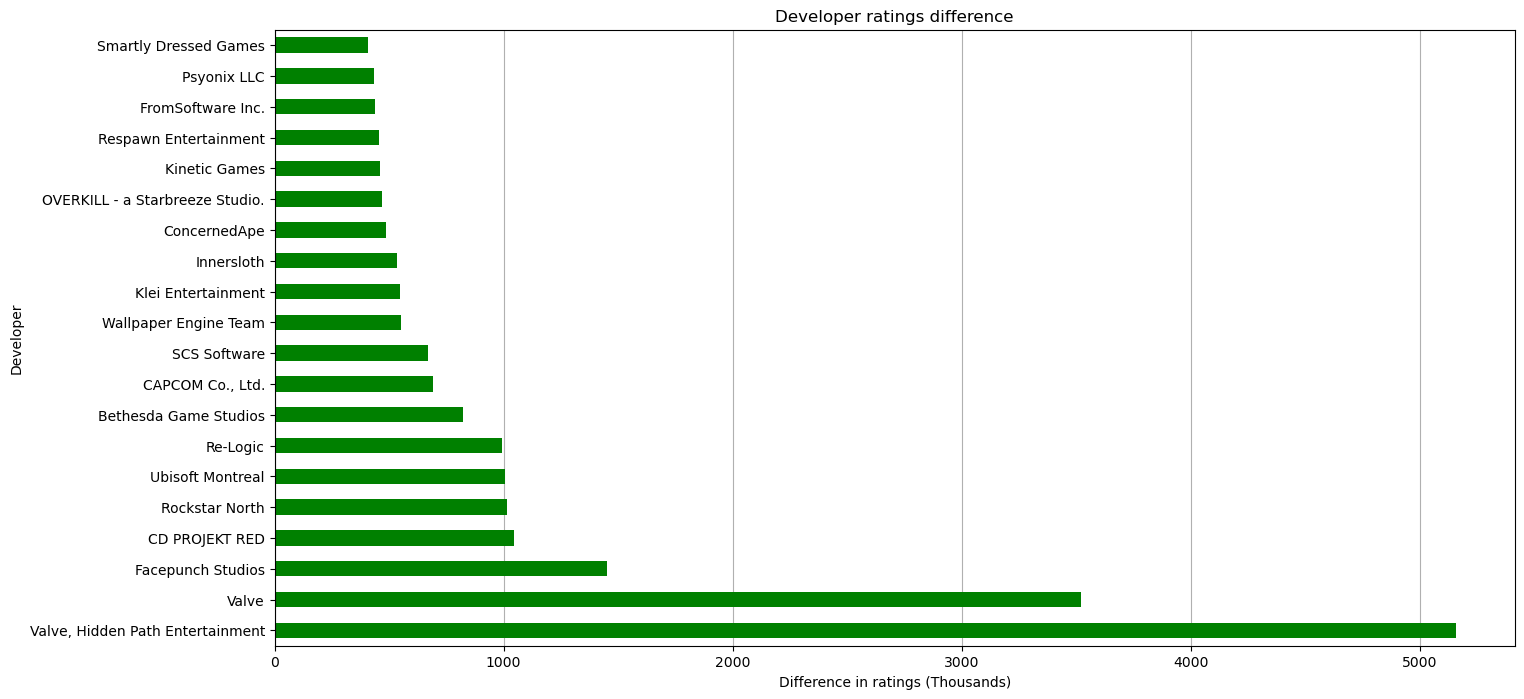

In [6]:
dev_ratios = data.groupby("Developer")["Rating Difference"].sum()
heads = dev_ratios.sort_values(ascending=False).head(20)/1000
fig2, ax2 = plt.subplots(figsize=(16,8))

heads.plot(kind='barh', color='green', ax=ax2)

plt.title('Developer ratings difference')
plt.xlabel('Difference in ratings (Thousands)')
plt.ylabel('Developer')

plt.grid(axis='x')
ax2.set_axisbelow(True)
plt.show()

In [7]:
data["Tags"] = data["Tags"].replace('(: \d*,)', '', regex=True)
data["Tags"]= data["Tags"].astype(str)
data["Tags"].head()

0    Action FPS Multiplayer Shooter Classic Team-Ba...
1    Shoot Em Up Metroidvania Bullet Hell Side Scro...
2    Rogue-like Turn-Based Combat RPG Perma Death R...
3    Typing Management Casual Difficult Arcade Stra...
4    Action Indie RPG Adventure Action Roguelike An...
Name: Tags, dtype: object

In [8]:
data["Genre"] = data["Genre"].replace(',', '', regex=True)
data["Publisher"] = data["Publisher"].replace(',', '', regex=True)
data["Genre"] = data["Genre"].astype(str)
data["Publisher"] = data["Publisher"].astype(str)
data["Info"] = data[["Publisher", "Tags", "Genre"]].agg(' '.join, axis=1)
data["Info"].shape

(24574,)

In [9]:
rand1 = np.random.randint(0, data.shape[1]+1)
rand2 = np.random.randint(0, data.shape[1]+1)


In [10]:
vect = CountVectorizer()
vmat = vect.fit_transform(data["Info"])
vmat.shape

(24574, 13013)

In [11]:
cosine_sim = cosine_similarity(vmat, vmat)
cosine_sim

array([[1.        , 0.17400444, 0.20119583, ..., 0.20261022, 0.08808303,
        0.27429019],
       [0.17400444, 1.        , 0.24441445, ..., 0.40895891, 0.27162564,
        0.23068393],
       [0.20119583, 0.24441445, 1.        , ..., 0.26270347, 0.11420805,
        0.19264016],
       ...,
       [0.20261022, 0.40895891, 0.26270347, ..., 1.        , 0.44854261,
        0.61779761],
       [0.08808303, 0.27162564, 0.11420805, ..., 0.44854261, 1.        ,
        0.42817442],
       [0.27429019, 0.23068393, 0.19264016, ..., 0.61779761, 0.42817442,
        1.        ]])

In [12]:
def rec(game:str, cos):
    ind = data[data["Name"] == game].index.to_list()[0]
    score = list(enumerate(cos[ind]))
    score = sorted(score, key=lambda x: x[1], reverse=True)
    score = score[1:21]
    top = [i[0] for i in score]
    return data["Name"].iloc[top]

In [13]:
game = input("Enter a game name for a recommendation!")
print('Recommendation for', data[data["Name"] == game].index.to_list()[0], game, '\n')
print('Recommendations using the publisher, tags, and genre \n')
print(rec(game, cosine_sim),'\n')

Recommendation for 15921 The Elder Scrolls V: Skyrim Special Edition 

Recommendations using the publisher, tags, and genre 

9343     The Elder Scrolls III: Morrowind Game of the Y...
9346     The Elder Scrolls IV: Oblivion Game of the Yea...
20525                          The Elder Scrolls V: Skyrim
23228    The Elder Scrolls IV: Oblivion Game of the Yea...
18465                       The Elder Scrolls V: Skyrim VR
9339                                             Fallout 3
9280                          Divinity II: Developer's Cut
13215                                            Fallout 4
9507                                                Sudeki
10694                                    Fable Anniversary
9356                   Fallout 3: Game of the Year Edition
12273                LIGHTNING RETURNS: FINAL FANTASY XIII
13715                                             Gothic 3
9697                                        Bound By Flame
12952                          Dragon's Dogma: D

In [14]:
print(data["Info"][15921])
print(data["Info"][9343])

Bethesda Softworks Open World RPG Adventure Singleplayer Fantasy Character Customization Dragons Moddable Story Rich Magic First-Person Action Atmospheric Great Soundtrack Third Person Stealth Classic Remake Female Protagonist Walking Simulator: 548 RPG
Bethesda Softworks RPG Open World Fantasy Classic Great Soundtrack Moddable Singleplayer First-Person Adventure Cult Classic Atmospheric Magic Exploration Story Rich Sandbox Action RPG Character Customization Medieval Action Third Person: 156 RPG


In [15]:
print(vmat[15921])
print("==============")
print(vmat[9343])

  (0, 607)	1
  (0, 849)	1
  (0, 885)	1
  (0, 1401)	1
  (0, 1754)	1
  (0, 2454)	1
  (0, 2583)	1
  (0, 3000)	1
  (0, 3582)	1
  (0, 4136)	1
  (0, 4191)	1
  (0, 4270)	1
  (0, 4993)	1
  (0, 7078)	1
  (0, 7584)	1
  (0, 8329)	1
  (0, 8653)	2
  (0, 9092)	1
  (0, 9469)	1
  (0, 9551)	1
  (0, 9738)	2
  (0, 10272)	1
  (0, 10280)	1
  (0, 10488)	1
  (0, 10560)	1
  (0, 10739)	1
  (0, 10822)	1
  (0, 11283)	1
  (0, 12100)	1
  (0, 12385)	1
  (0, 121)	1
  (0, 849)	2
  (0, 885)	1
  (0, 1401)	1
  (0, 1754)	1
  (0, 2454)	1
  (0, 2583)	2
  (0, 2983)	1
  (0, 3000)	1
  (0, 4072)	1
  (0, 4136)	1
  (0, 4270)	1
  (0, 4993)	1
  (0, 7078)	1
  (0, 7323)	1
  (0, 7584)	1
  (0, 8329)	1
  (0, 8653)	2
  (0, 9551)	1
  (0, 9738)	3
  (0, 9867)	1
  (0, 10280)	1
  (0, 10488)	1
  (0, 10560)	1
  (0, 10822)	1
  (0, 11283)	1
  (0, 12385)	1


In [16]:
def rec2(game:str):
    ind = data[data["Name"] == game].index.to_list()[0]
    score = sorted(list(enumerate(cosine_sim[ind])), key=lambda x: x[1], reverse=True)
    for i in score[1:21]:
        print(data.iloc[i[0]].Name, "-\nwith similarity of: %.5f%%" % (i[1]*100.0))
        print()

In [17]:
rand = np.random.randint(0, data.shape[1]+1)
game_name = data['Name'][rand]
print('Recommendation for ', game_name, '\n')
print('Recommendations using the publisher, tags, and genre \n')
print(rec2(game_name), '\n')

Recommendation for  Cook, Serve, Delicious! 3?! 

Recommendations using the publisher, tags, and genre 

Cook, Serve, Delicious! 2!! -
with similarity of: 90.97177%

Cook, Serve, Delicious! -
with similarity of: 88.37800%

Witchtastic -
with similarity of: 80.42519%

Overcooked! 2 -
with similarity of: 80.34482%

Cosmo's Quickstop -
with similarity of: 78.17548%

Diner Bros -
with similarity of: 76.92589%

Overcooked -
with similarity of: 75.96471%

SPITLINGS -
with similarity of: 74.83925%

Spacelines from the Far Out -
with similarity of: 73.69555%

Bake 'n Switch -
with similarity of: 73.50504%

Rover Wars -
with similarity of: 73.40253%

Raiders Of The Lost Island -
with similarity of: 72.85088%

Tools Up! -
with similarity of: 72.71421%

Totally Reliable Delivery Service Beta -
with similarity of: 72.41379%

Trash Sailors: Co-Op Trash Raft Simulator -
with similarity of: 72.29188%

Color Breakers -
with similarity of: 72.23080%

Critter Crunch -
with similarity of: 71.94090%

Flat